In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.1
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [7]:
# 多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
# 多的输出，是使用hidden2作为一个输入，只用deep做预测
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_wide, input_deep],
                           outputs = [output, output2])
        
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 30)           210         ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           930         ['dense_4[0][0]']                
                                                                                            

In [8]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

# 因为有多个output，所以需要有多个y
history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    [y_train, y_train],
                    validation_data = (
                        [x_valid_scaled_wide, x_valid_scaled_deep],
                        [y_valid, y_valid]),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.7257 - dense_6_loss: 0.7118 - dense_7_loss: 1.0138 - val_loss: 1.2362 - val_dense_6_loss: 0.5168 - val_dense_7_loss: 0.7194
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0938 - dense_6_loss: 0.4586 - dense_7_loss: 0.6351 - val_loss: 1.1124 - val_dense_6_loss: 0.4695 - val_dense_7_loss: 0.6429
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9957 - dense_6_loss: 0.4357 - dense_7_loss: 0.5600 - val_loss: 1.0461 - val_dense_6_loss: 0.4309 - val_dense_7_loss: 0.6152
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9259 - dense_6_loss: 0.4059 - dense_7_loss: 0.5200 - val_loss: 0.9495 - val_dense_6_loss: 0.4212 - val_dense_7_loss: 0.5283
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8823 - dense_6_loss: 0.3891 - dense_7_loss: 0.4933 - val_loss: 0.8947 - val_dense_6_loss: 0.3962 - val_dense_7_loss: 0.

In [9]:
print(history.history)

{'loss': [1.725669264793396, 1.093778371810913, 0.9957433342933655, 0.9258897304534912, 0.8823041319847107, 0.8500095009803772, 0.8334752917289734, 0.813149094581604, 0.7973303198814392, 0.7868197560310364, 0.7708067297935486, 0.7625411152839661, 0.7513846755027771, 0.7407735586166382, 0.7341181039810181, 0.727911114692688, 0.7228460907936096, 0.7163286209106445, 0.7194739580154419, 0.7069661617279053, 0.713340699672699, 0.702363908290863, 0.7031678557395935, 0.6953387260437012, 0.7020865082740784, 0.688742458820343, 0.6899184584617615, 0.6869584918022156], 'dense_6_loss': [0.711849570274353, 0.458631694316864, 0.43574056029319763, 0.4058510959148407, 0.3890500068664551, 0.37844976782798767, 0.37588274478912354, 0.3664243221282959, 0.3600231111049652, 0.3573211431503296, 0.3509455621242523, 0.3477526605129242, 0.34282732009887695, 0.3391807973384857, 0.33614641427993774, 0.33411499857902527, 0.33161574602127075, 0.32883262634277344, 0.33057522773742676, 0.3254900276660919, 0.3285762965

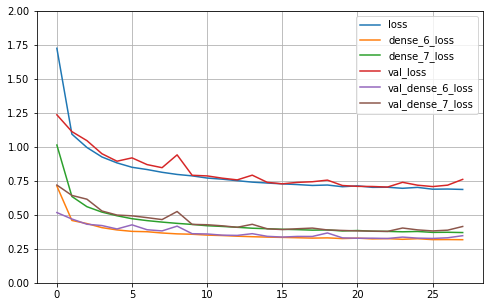

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
plot_learning_curves(history)

In [11]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep],
               [y_test, y_test], verbose=0)

[0.7439249157905579, 0.34518104791641235, 0.3987436592578888]